In [11]:
import datetime
import pandas as pd
from matplotlib import pyplot

In [2]:
def timestamp_converter(string):
    timestamp = int(float(string) / 1000)
    return datetime.datetime.fromtimestamp(timestamp)

converter_functions = {
    "created_at": timestamp_converter,
    "last_move_at": timestamp_converter
}

In [4]:
games = pd.read_csv("../games.csv", converters=converter_functions)

In [5]:
player_names = []
for name in games.white_id:
    player_names.append(name)

for name in games.black_id:
    player_names.append(name)

player_names = list(set(player_names))

In [7]:
player_games = {}
for i, name in enumerate(player_names):
    if i % 10 == 0:
        print("Processed", i, "players.", end="\r")

    # Extract all the games played in
    games_as_white = games[games.white_id == name]
    games_as_black = games[games.black_id == name]
    won_white = games_as_white[games.winner == "white"]
    won_black = games_as_black[games.winner == "black"]

    count_won = len(won_white) + len(won_black)
    player_games[name] = count_won

<ipython-input-7-42e025e0704e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  won_white = games_as_white[games.winner == "white"]
<ipython-input-7-42e025e0704e>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  won_black = games_as_black[games.winner == "black"]


In [10]:
%%time
def get_player_wins(name):
    return player_games[name]

winner = max(player_games, key=get_player_wins)
not_winner = min(player_games, key=get_player_wins)
print(winner, get_player_wins(winner))
print(not_winner, get_player_wins(not_winner))

taranga 72
oktry 0
Wall time: 27 ms


### Find all players who have won at least one match
1. Extract the items from the dictionary, giving you a list of tuples.

2. Find/remove players who have won 0 matches, or extract the players who have won at least 1

```filter()```

3. Print the number of players with at least one win.

In [18]:
players_who_won = {}

for i in range(1, 21):
    player_games_list = player_games.items()

    def has_won_one(item):
        name, matches_won = item
        return matches_won >= i

    players_who_won[i] = list(filter(has_won_one, player_games_list))

In [19]:
for count, players in players_who_won.items():
    print(count, len(players))

1 8878
2 2183
3 1116
4 832
5 678
6 582
7 513
8 462
9 415
10 376
11 345
12 320
13 291
14 258
15 232
16 209
17 191
18 173
19 144
20 136


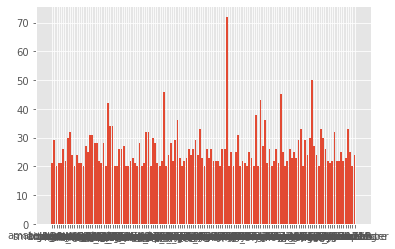

In [20]:
pyplot.style.use("ggplot")
names = [player[0] for player in players_who_won[20]]
counts = [player[1] for player in players_who_won[20]]
pyplot.bar(names, counts)
pyplot.show()